In [7]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;


%matplotlib inline

# For Data Preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# For building the LSTM Model
from keras.models import Sequential
from keras.layers import LSTM, Dense

# For evaluating the model
from sklearn.metrics import mean_squared_error

data = pd.read_csv('Data/Scalanie2.csv', parse_dates=['Data'])

In [8]:
data.dropna(inplace=True)

In [9]:
data_df = data

In [24]:
data_df.rename(columns = {'(pył zawieszony PM2.5 [jednostka ug/m3])':'PM2.5'
                    , '(pył zawieszony PM10 [jednostka ug/m3])':'PM10'
                    , '(tlenek azotu [jednostka ug/m3])':'NO'
                    , '(tlenki azotu [jednostka ug/m3])':'NOs'
                    , '(tlenek węgla [jednostka ug/m3])':'CO'
                    , '(benzen [jednostka ug/m3])':'benzen'
                    , '(dwutlenek azotu [jednostka ug/m3])':'NO2'
                    , 'Scalanie1.B00202A.Wynik':'Kierunek wiatru'
                    , 'Scalanie1.B00300S.Wynik':'Temperatura powietrza'
                    , 'Scalanie1.B00606S.Wynik':'Opady'
                    , 'Scalanie1.B00702A.Wynik':'Predkosc wiatru'
                    , 'Scalanie1.B00703A.Wynik':'MAX Predkosc wiatru'
                    , 'Scalanie1.B00802A.Wynik':'Wilgotnosc powietrza'
                    }, inplace = True)

In [21]:
data_df = data_df.drop(['Scalanie1.Stacja','Scalanie1.Data','Scalanie1.Rodzaj'], axis=1)

KeyError: "['Scalanie1.Stacja', 'Scalanie1.Data', 'Scalanie1.Rodzaj'] not found in axis"

In [25]:
data_df

,Data,PM2.5,PM10,NO,NOs,CO,benzen,NO2,Kierunek wiatru,Temperatura powietrza,Opady,Predkosc wiatru,MAX Predkosc wiatru,Wilgotnosc powietrza
0,2019-01-03 07:00:00,6.8,7.3,25.1,75.7,0.3,0.5,37.3,69.333333,-2.700000,0.0,6.683333,9.833333,69.333333
1,2019-01-06 08:00:00,16.1,16.8,13.6,34.4,0.3,0.5,13.5,90.666667,-5.733333,0.0,4.633333,6.666667,90.666667
2,2019-01-15 03:00:00,9.9,10.3,0.9,7.3,0.3,0.5,6.0,78.833333,-1.933333,0.0,8.550000,10.833333,78.833333
3,2019-01-15 04:00:00,9.6,10.0,0.6,7.7,0.3,0.5,6.7,85.666667,-2.116667,0.0,9.266667,11.833333,85.666667
4,2019-03-08 05:00:00,6.8,10.3,21.4,71.6,0.3,0.5,38.9,81.833333,7.150000,0.0,3.466667,3.666667,81.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,2020-03-01 13:00:00,15.8,20.2,4.6,17.8,0.3,1.1,10.8,75.000000,6.216667,0.2,5.916667,8.983333,75.000000
26364,2021-09-19 16:00:00,12.5,16.4,11.7,37.5,0.3,1.2,19.6,96.166667,8.866667,0.2,4.683333,6.250000,96.166667
26366,2021-11-04 14:00:00,7.0,12.2,9.2,28.3,0.3,1.3,14.2,78.833333,14.566667,0.2,4.766667,7.983333,78.833333
26368,2021-12-05 08:00:00,18.7,23.2,5.7,17.9,0.3,1.6,9.1,93.833333,0.200000,0.2,0.983333,1.633333,93.833333


In [6]:
data_df.describe()

,PM2.5,PM10,NO,NOs,CO,benzen,NO2,Scalanie1.Stacja,Scalanie1.Wynik,Scalanie1.B00300S.Wynik,Scalanie1.B00606S.Wynik,Scalanie1.B00702A.Wynik,Scalanie1.B00703A.Wynik,Scalanie1.B00802A.Wynik
count,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.0,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000
mean,22.090513,28.761659,24.912202,66.477684,0.451288,1.446558,29.224381,350220580.0,76.741014,9.323174,0.067456,3.816359,5.499758,76.741014
std,20.413648,22.899676,34.111791,64.508164,0.301597,2.247832,17.490975,0.0,18.783071,8.697416,0.572861,2.194011,3.232747,18.783071
min,0.000000,1.400000,0.000000,2.100000,0.100000,0.000000,0.900000,350220580.0,14.666667,-17.450000,0.000000,0.000000,0.000000,14.666667
25%,9.900000,14.900000,5.000000,24.800000,0.300000,0.500000,15.800000,350220580.0,64.000000,2.400000,0.000000,2.133333,2.983333,64.000000
50%,16.400000,22.900000,13.100000,47.100000,0.400000,0.800000,26.300000,350220580.0,81.666667,8.483333,0.000000,3.433333,4.933333,81.666667
75%,26.700000,34.500000,31.625000,85.900000,0.500000,1.600000,39.500000,350220580.0,92.333333,15.950000,0.000000,5.116667,7.450000,92.333333
max,282.700000,315.700000,483.100000,838.200000,4.400000,49.100000,131.500000,350220580.0,100.000000,34.000000,36.400000,17.300000,24.283333,100.000000


In [27]:
data_df.value_counts() 

Data                 PM2.5  PM10  NO    NOs    CO   benzen  NO2 
2021-01-01 20:00:00  23.8   28.3  2.8   16.1   0.6  1.0     11.7    2
2020-01-01 02:00:00  10.8   14.8  6.9   21.2   0.3  0.7     10.6    2
2020-01-01 04:00:00  8.0    11.7  5.8   17.3   0.2  0.5     8.5     2
2020-01-01 05:00:00  8.3    11.9  5.3   16.5   0.2  0.4     8.4     2
2020-01-01 06:00:00  8.7    12.3  4.9   14.5   0.2  0.4     6.9     2
                                                                   ..
2019-12-10 17:00:00  17.7   24.8  73.6  179.2  0.6  2.1     66.3    1
2019-12-10 16:00:00  13.1   18.9  84.8  198.2  0.6  1.3     68.2    1
2019-12-10 15:00:00  10.3   15.4  47.7  123.8  0.4  1.2     50.6    1
2019-12-10 14:00:00  11.3   11.8  43.6  112.2  0.4  1.2     45.3    1
2022-01-01 22:00:00  9.5    13.3  4.9   20.4   0.2  3.8     12.9    1
Length: 24225, dtype: int64

In [28]:
data_df = data_df.reset_index()
six_df = pd.DataFrame()
twelve_df = pd.DataFrame()
tf_df = pd.DataFrame()
for i in range(len(data_df)):
    six_df = pd.concat([six_df,pd.DataFrame({'PM2.5 6hr_avg':[sum(data_df['PM2.5'].iloc[i:i+6])/6]}, index = [i+6])])
    twelve_df = pd.concat([twelve_df,pd.DataFrame({'PM2.5 12hr_avg':[sum(data_df['PM2.5'].iloc[i:i+12])/12]}, index = [i+12])])
    tf_df = pd.concat([tf_df,pd.DataFrame({'PM2.5 24hr_avg':[sum(data_df['PM2.5'].iloc[i:i+24])/24]}, index = [i+24])])
   
data_df = pd.merge(data_df, six_df, left_index=True, right_index=True)
data_df = pd.merge(data_df, twelve_df, left_index=True, right_index=True)
data_df = pd.merge(data_df, tf_df, left_index=True, right_index=True)


In [29]:
data_df['H'] = pd.to_datetime(data_df['Data']).dt.time
data_df['H'] = data_df['H'].astype('string')

In [30]:
data_df['H'] = data_df['H'].str.replace(r'\D', '')

C:\Users\Admin\AppData\Local\Temp\ipykernel_37536\4249282884.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df['H'] = data_df['H'].str.replace(r'\D', '')


In [31]:
data_df['H'] = data_df['H'].str.replace(r'.{4}$', '')


C:\Users\Admin\AppData\Local\Temp\ipykernel_37536\1843561337.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df['H'] = data_df['H'].str.replace(r'.{4}$', '')


In [32]:
data_df['H'] = data_df['H'].astype('float')

In [33]:
data_df = data_df.drop('index', axis=1)
data_df['Data'] = pd.to_datetime(data_df['Data'], format='%Y%m%d %H')
data_df.index = data_df['Data']
data_df = data_df.drop('Data', axis=1)

In [52]:
scaler = MinMaxScaler(feature_range=(0, 1))
values = scaler.fit_transform(data_df)
data_df2 = pd.DataFrame(values)

In [54]:
values

array([[0.02829855, 0.02386255, 0.03425168, ..., 0.02936264, 0.02255111,
        0.30434783],
       [0.02829855, 0.02354438, 0.03822288, ..., 0.02613897, 0.02280664,
        0.39130435],
       [0.03042094, 0.02481705, 0.02283445, ..., 0.02683808, 0.02108177,
        0.43478261],
       ...,
       [0.51185002, 0.49697741, 0.08339538, ..., 0.9405756 , 0.78847956,
        0.        ],
       [0.47081712, 0.46038816, 0.09890792, ..., 0.89726958, 0.80941227,
        0.04347826],
       [0.40856031, 0.39548202, 0.05820303, ..., 0.85151668, 0.82457411,
        0.08695652]])

In [35]:
data_df2.columns = data_df.columns
data_df2.index = data_df.index 

In [36]:
data_df2.dropna(inplace=True)

In [60]:
dataset = np.log1p(data_df2[['PM2.5']].values)
dataset.shape

KeyError: "None of [Index(['PM2.5'], dtype='object')] are in the [columns]"

<Figure size 864x360 with 0 Axes>

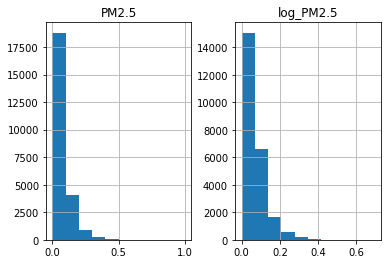

In [38]:
dist_df = pd.DataFrame({'PM2.5' : data_df2['PM2.5'].values, 'log_PM2.5' : dataset[:,0]})

# histogram plot original vs log transform data
plt.figure(figsize=(12,5))
dist_df.hist();

In [39]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

19395 4849


In [40]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [41]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print('Shape of trainX :', trainX.shape)
print('Shape of trainY :', trainY.shape)
print('Shape of testX :', testX.shape)
print('Shape of testY :', testY.shape)

Shape of trainX : (19393, 1)
Shape of trainY : (19393,)
Shape of testX : (4847, 1)
Shape of testY : (4847,)


In [42]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print('Shape of trainX :', trainX.shape)
print('Shape of testX :', testX.shape)

Shape of trainX : (19393, 1, 1)
Shape of testX : (4847, 1, 1)


In [43]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
607/607 - 3s - loss: 8.9117e-04 - 3s/epoch - 6ms/step
Epoch 2/100
607/607 - 2s - loss: 4.7135e-04 - 2s/epoch - 3ms/step
Epoch 3/100
607/607 - 2s - loss: 4.2117e-04 - 2s/epoch - 3ms/step
Epoch 4/100
607/607 - 2s - loss: 4.2146e-04 - 2s/epoch - 3ms/step
Epoch 5/100
607/607 - 2s - loss: 4.2143e-04 - 2s/epoch - 3ms/step
Epoch 6/100
607/607 - 2s - loss: 4.2189e-04 - 2s/epoch - 3ms/step
Epoch 7/100
607/607 - 1s - loss: 4.2201e-04 - 1s/epoch - 2ms/step
Epoch 8/100
607/607 - 1s - loss: 4.2132e-04 - 1s/epoch - 2ms/step
Epoch 9/100
607/607 - 1s - loss: 4.2106e-04 - 1s/epoch - 2ms/step
Epoch 10/100
607/607 - 1s - loss: 4.2093e-04 - 1s/epoch - 2ms/step
Epoch 11/100
607/607 - 1s - loss: 4.2107e-04 - 1s/epoch - 2ms/step
Epoch 12/100
607/607 - 1s - loss: 4.2038e-04 - 1s/epoch - 2ms/step
Epoch 13/100
607/607 - 1s - loss: 4.2090e-04 - 1s/epoch - 2ms/step
Epoch 14/100
607/607 - 1s - loss: 4.2092e-04 - 1s/epoch - 2ms/step
Epoch 15/100
607/607 - 1s - loss: 4.2151e-04 - 1s/epoch - 2ms/step
Epoc

In [90]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = np.expm1(trainPredict)
trainY = np.expm1(trainY)
testPredict = np.expm1(testPredict)
testY = np.expm1(testY)

In [78]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.02 RMSE
Test Score: 0.08 RMSE


In [79]:
test_series = pd.Series(testY)

# state of model performance
if testScore < test_series.std():
    print('\n[ Model performance is GOOD enough ]')
    print('\nRMSE of test prediction < Standard deviation of test dataset')
    print('%.2f' % (testScore), '<', '%.2f' % (test_series.std()))
else:
    print('\n[ Model performance is NOT GOOD enough ]')
    print('\nRMSE of test prediction > Standard deviation of test dataset')
    print('%.2f' % (testScore), '>', '%.2f' % (test_series.std()))


[ Model performance is GOOD enough ]

RMSE of test prediction < Standard deviation of test dataset
0.08 < 0.11


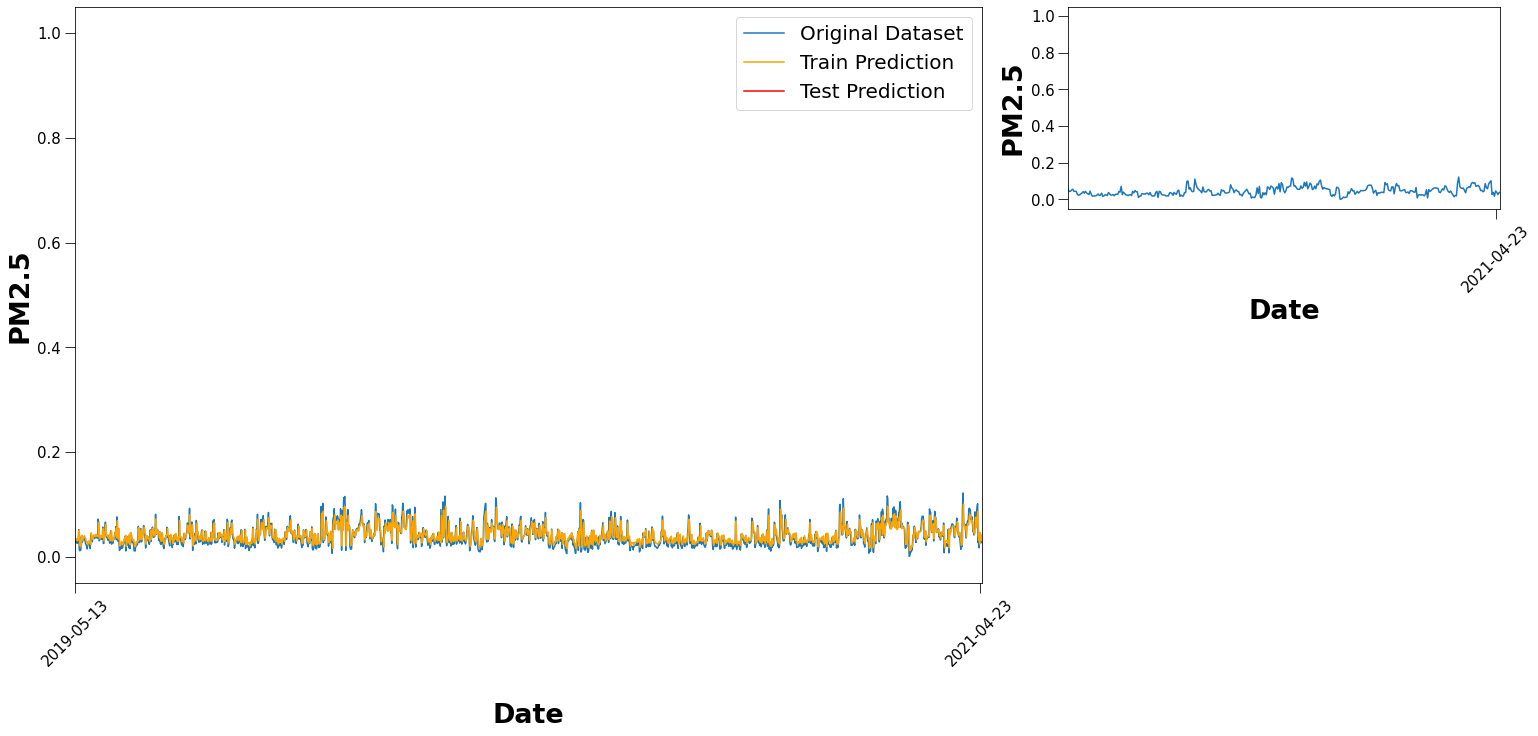

In [80]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot original dataset and predictions
time_axis = np.linspace(0, dataset.shape[0]-1, 15)
time_axis = np.array([int(i) for i in time_axis])
time_axisLab = np.array(data_df.index, dtype='datetime64[D]')

fig = plt.figure()
ax = fig.add_axes([0, 0, 2.1, 2])
ax.plot(np.expm1(dataset), label='Original Dataset')
ax.plot(trainPredictPlot, color='orange', label='Train Prediction')
ax.plot(testPredictPlot, color='red', label='Test Prediction')
ax.set_xticks(time_axis)
ax.set_xticklabels(time_axisLab[time_axis], rotation=45)
ax.set_xlabel('\nDate', fontsize=27, fontweight='bold')
ax.set_ylabel('PM2.5', fontsize=27, fontweight='bold')
ax.legend(loc='best', prop= {'size':20})
ax.tick_params(size=10, labelsize=15)
ax.set_xlim([-1,1735])

ax1 = fig.add_axes([2.3, 1.3, 1, 0.7])
ax1.plot(np.expm1(dataset), label='Original Dataset')
ax1.plot(testPredictPlot, color='red', label='Test Prediction')
ax1.set_xticks(time_axis)
ax1.set_xticklabels(time_axisLab[time_axis], rotation=45)
ax1.set_xlabel('Date', fontsize=27, fontweight='bold')
ax1.set_ylabel('PM2.5', fontsize=27, fontweight='bold')
ax1.tick_params(size=10, labelsize=15)
ax1.set_xlim([1360,1735]);

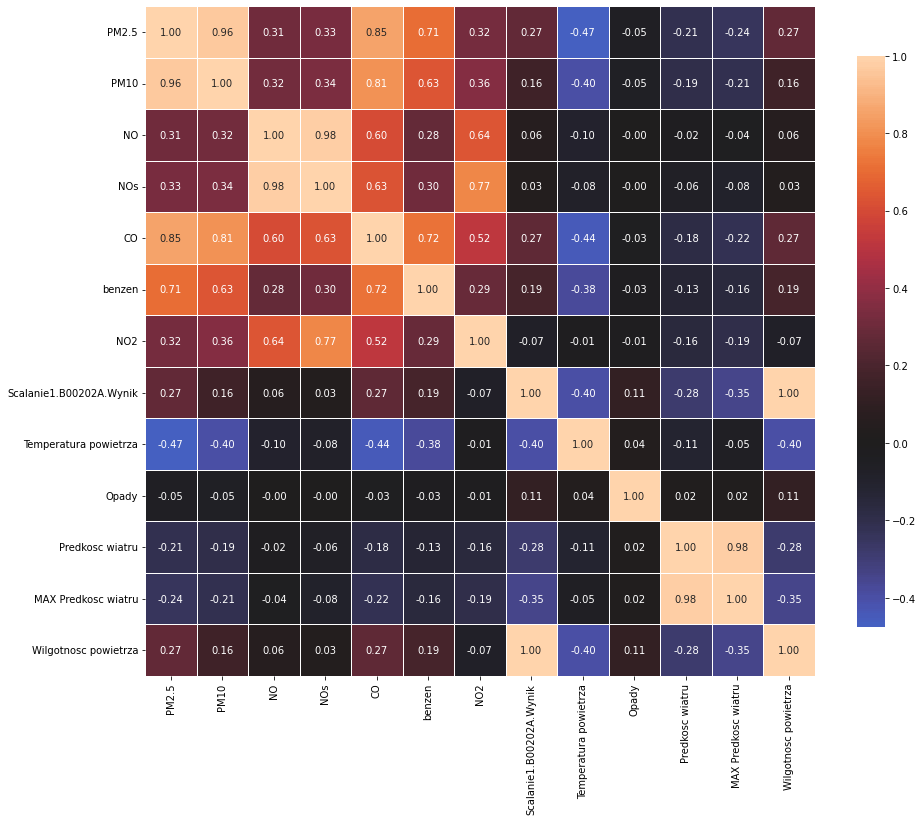

In [23]:
correlations = data_df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

In [96]:
data_df = data_df.drop('Data', axis=1)
data_df = data_df.reset_index()

In [107]:
data_df['M'] = pd.to_datetime(data_df['Data']).dt.month

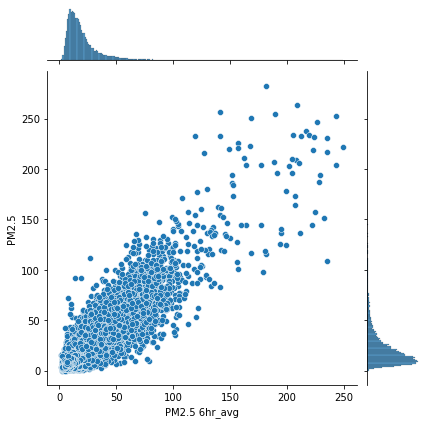

In [97]:
sns.jointplot(x=data_df['PM2.5 6hr_avg'], y=data_df['PM2.5'], data = data_df)

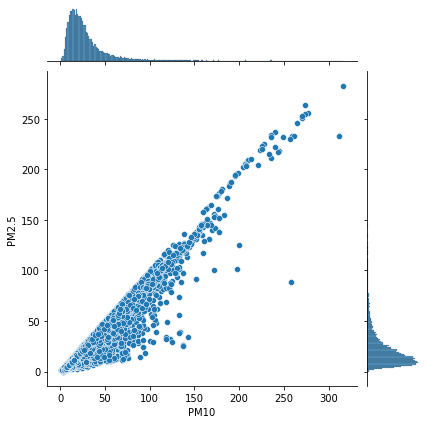

In [98]:
sns.jointplot(x=data_df['PM10'], y=data_df['PM2.5'], data = data_df)

In [89]:
data_df['Data'] = pd.to_datetime(data['Data'], format='%Y%m%d %H')
data.groupby(pd.to_datetime(data['Data']).dt.hour).count()


,Data,PM2.5,PM10,NO,NOs,CO,benzen,NO2
Data,,,,,,,,
0,1017,1017,1017,1017,1017,1017,1017,1017
1,996,996,996,996,996,996,996,996
2,1015,1015,1015,1015,1015,1015,1015,1015
3,1012,1012,1012,1012,1012,1012,1012,1012
4,1010,1010,1010,1010,1010,1010,1010,1010
5,1014,1014,1014,1014,1014,1014,1014,1014
6,1026,1026,1026,1026,1026,1026,1026,1026
7,1027,1027,1027,1027,1027,1027,1027,1027
8,1019,1019,1019,1019,1019,1019,1019,1019


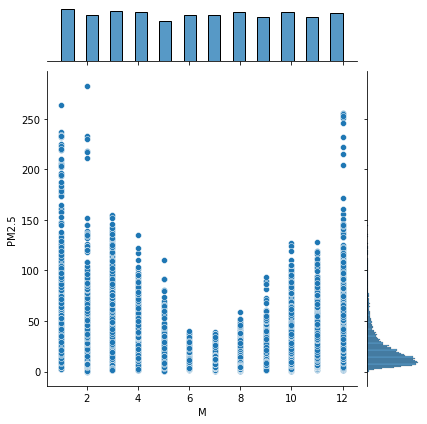

In [108]:
sns.jointplot(x=data_df['M'], y=data_df['PM2.5'], data = data_df)

In [ ]:
temp_df = pd.DataFrame()
for i in range(len(data_df)):
    temp_df = pd.concat([temp_df,pd.DataFrame({'PM2.5 6hr_avg':[sum(data_df['AirTemperature'].iloc[i:i+6])/6]}, index = [i+6])]) 
data_df = pd.merge(data_df, six_df, left_index=True, right_index=True)